# Universidad Autonoma del Estado de México
## Centro universitario UAEM Zumpango

# Ingenieria en computacion
## Graficacion computacional
**Alumno:** Alvaro Jesus Castro Pizaña

Fecha: 07 de Octubre del 2024

Convexo Envolvente

In [2]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt


# Funciones

validamos si es que existe un **giro hacia la derecha** o no
eliminando el punto intermedio para asegurar que el contorno sea convexo

Comienza tomando *dos puntos* y luego se agrega 1 a 1 para verificar 
que los ultimos puntos hagan un giro a la derecha 
    y si no lo hacen elimina el punto **intermedio** (corregir el camino)

In [24]:
#Funciones

def turn_right():
    # inicializamos un array con los primeros dos puntos de la lista de coordenadas
    array = [coord_points[0], coord_points[1]]
    
    # pasamos por los puntos restantes de coord_points comenzando desde el tercer punto
    for i in range(2, len(coord_points)):
        # Agregamos el siguiente punto al array
        array.append(coord_points[i])
        
        # solo si hay al menos 3 puntos en el array
        # y los 3 ultimos puntos forman un giro hacia la derecha (+,+)
        while len(array) > 2 and np.linalg.det([array[-3], array[-2], array[-1]]) > 0:
            # eliminar punto medio (penultimo)
            array.pop(-2)
    
    return array


primero se *ordenan* los puntos 
y se construye 2 partes del **contorno** la *superior* e *inferior*
para obtener un forma convexa y devolverlo

In [26]:

def convex_hull():
    # ordenar los puntos por sus x (en caso de que hayan +2 puntos con la misma x, se ordenan por y)
    coord_points.sort()
    
    # calcular la parte superior del contorno convexo
    l_upper = turn_right()
    
    # invertir el orden de los puntos para calcular la parte inferior
    coord_points.reverse()
    
    # calculae la parte inferior
    l_lower = turn_right()
    
    # se juntan ambas partes
    l = l_upper + l_lower
    
    return l


funcion para graficar los **puntos originales** y el **contorno** (que se hace con la funcion anterior)
despues se dibujan en un plot 
con una con una **linea que conecta los puntos del contorno**

In [27]:

def graph(convex_pol, coord_points):
    #Acomodando listas adecuadas 
    x_points = [i[0] for i in coord_points]
    y_points = [i[1] for i in coord_points]

    x_polygon = [i[0] for i in convex_pol]
    y_polygon = [i[1] for i in convex_pol]

    #definiendo limites de la grafica
    x_lim_der = max(x_points)+5
    y_lim_sup = max(y_points)+5
    x_lim_izq = min(x_points)-5
    y_lim_inf = min(y_points)-5

    # Asignacion de los liites extremos
    plt.xlim(x_lim_izq,x_lim_der)
    plt.ylim(y_lim_inf, y_lim_sup)

    #Graficacion 
    plt.title('Problema: convex hull')
    plt.xlabel('Eje de las abscisas')
    plt.xlabel('Eje de las ordenadas')
    plt.plot(x_points, y_points, 'ko')
    plt.plot(x_polygon, y_polygon, 'g-', linewidth = 3.0)


## Generacion de coordenadas de forma aleatorea

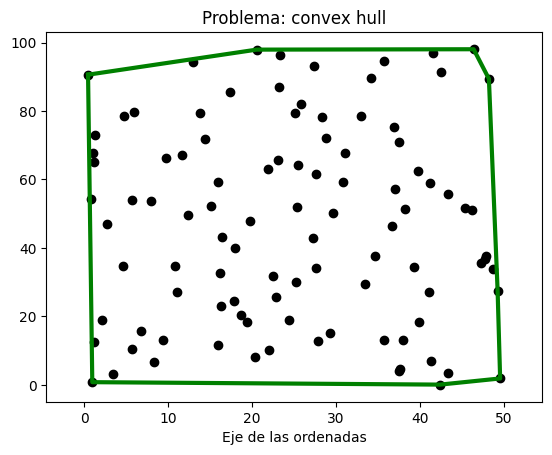

In [28]:

num_points = 100
coord_points = []
for i in range(num_points): coord_points.append([rand.uniform(0,50), rand.uniform(0,100), 1.0])

# creacion y graficacion
convex_pol = convex_hull()
graph(convex_pol,  coord_points)

## generacion de un rectangulo con puntos

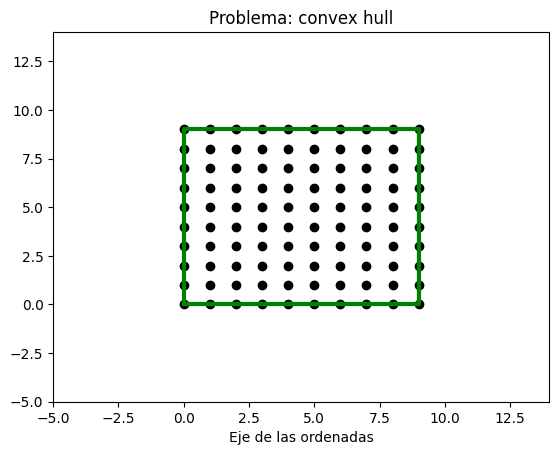

In [29]:
num_points = 100
coord_points = [[x, y, 1.0] for x in range(10) for y in range(10)]

# creacion del convexo
convex_pol = convex_hull()
graph(convex_pol,  coord_points)
plt.show()


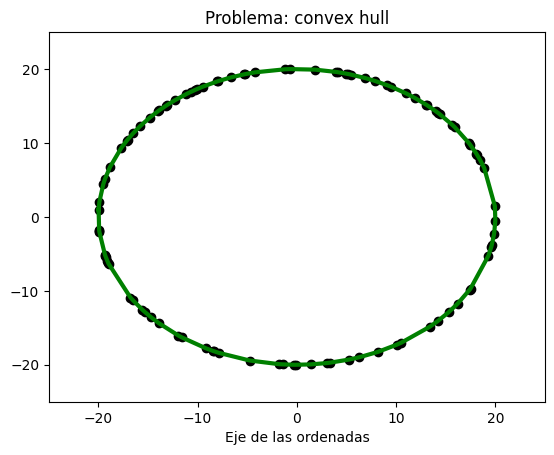

In [34]:
num_points = 100
coord_points = []

for _ in range(num_points):
    angulo = rand.uniform(0, 2 * np.pi)
    print
    x = 20 * np.cos(angulo)
    y = 20 * np.sin(angulo)
    coord_points.append([x, y, 1.0])

convex_pol = convex_hull()
graph(convex_pol, coord_points)
plt.show()
